## Redes Convolucionales para reconocimiento de imágenes

## Actividad calificada por el personal

### Propósito 

En el laboratorio "Implementación de Redes Convolucionales en Keras" se propuso una implementación a través de *"Keras"* de una red convolucional para una base de datos que contiene imágenes de dígitos manuscritos. En este *notebook* se pretende evaluar el uso de *keras* al aplicar una red convolucional sobre un conjunto de imágenes más complejo, "Fashion MNIST". 

### Instrucciones generales

1. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

2. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

### Criterios a evaluar

Los criterios que se evaluarán son:

Preparación de las variables: Se adaptan los datos apropiadamente para el uso de las funciones de `keras` y realiza la partición de la muestra en entrenamiento, validación y test. [15 puntos]

Estimación de un modelo utilizando redes neuronales convolucionales: Se estima el modelo usando una CNN, se establecen los parámetros y estructuras apropiadamente, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [45 puntos]

Calidad de la predicción: La arquitectura implementada posee un buen desempeño entre el nivel de precisión obtenido y el tiempo de ejecución. **Nota: Se considera un nivel de precisión del 91% como buen desempeño para este laboratorio**. Asegúrese de no implementar una red excesivamente profunda probándola en los servidores que ofrece la plataforma Coursera, pues con estos realizamos la calificaciónde su solución. [40 puntos]


#### Problema

Fashion-MNIST es una base de datos de imágenes de artículos de la tienda de ropa Zalando, que consta de un set de entrenamiento de 60000 muestras y un set de test de 10000 muestras. Cada dato es una imagen en escala de grises de una prenda de vestir, asociada con una etiqueta de 10 clases.

Ustedes deben proponer el algoritmo para hacer la clasificación de las prendas con una red neuronal convolucional.

### Librerías a importar

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras import initializers
from tensorflow.keras.utils import set_random_seed
import tensorflow as tf

# Set random seed for reproducibility
set_random_seed(812)

import time 

In [2]:
# Función para graficar la historia del entrenamiento
import matplotlib.pyplot as plt

def plot_history(history):
    """
    Plots training and validation loss and accuracy.

    Parameters:
      history: A dictionary containing keys:
          'loss', 'val_loss', 'accuracy', and 'val_accuracy'.
          (If a Keras History object is passed, its `.history` attribute will be used.)
    """
    hist = history.history if hasattr(history, 'history') else history

    # Final metrics
    print(f"Train Loss final: {hist['loss'][-1]:.3f}, "
          f"Train Accuracy final: {hist['accuracy'][-1]:.3f}")
    print(f"Validation Loss final: {hist['val_loss'][-1]:.3f}, "
          f"Validation Accuracy final: {hist['val_accuracy'][-1]:.3f}")

    plt.figure(figsize=(12, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(hist['loss'], label='Training Loss', marker='o')
    plt.plot(hist['val_loss'], label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs. Validation Loss')
    plt.legend()
    plt.grid(True)

    # AUC plot
    plt.subplot(1, 2, 2)
    plt.plot(hist['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(hist['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs. Validation Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

### 1. Preparación de las variables (15 puntos)

Adapte los datos apropiadamente para el uso de las funciones de `keras` y realiza la partición de la muestra en entrenamiento, validación y test.

In [3]:
# Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
print('Dimensiones de los datos de Training: ', x_train.shape, y_train.shape)
print('Dimensiones de los datos de Testing: ', x_test.shape, y_test.shape)

Dimensiones de los datos de Training:  (60000, 28, 28) (60000,)
Dimensiones de los datos de Testing:  (10000, 28, 28) (10000,)


In [5]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Número total de clases: ', nClasses)
print('Clases/labels: ', classes)

Número total de clases:  10
Clases/labels:  [0 1 2 3 4 5 6 7 8 9]


In [6]:
counts = np.bincount(y_train)
print(counts)

[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


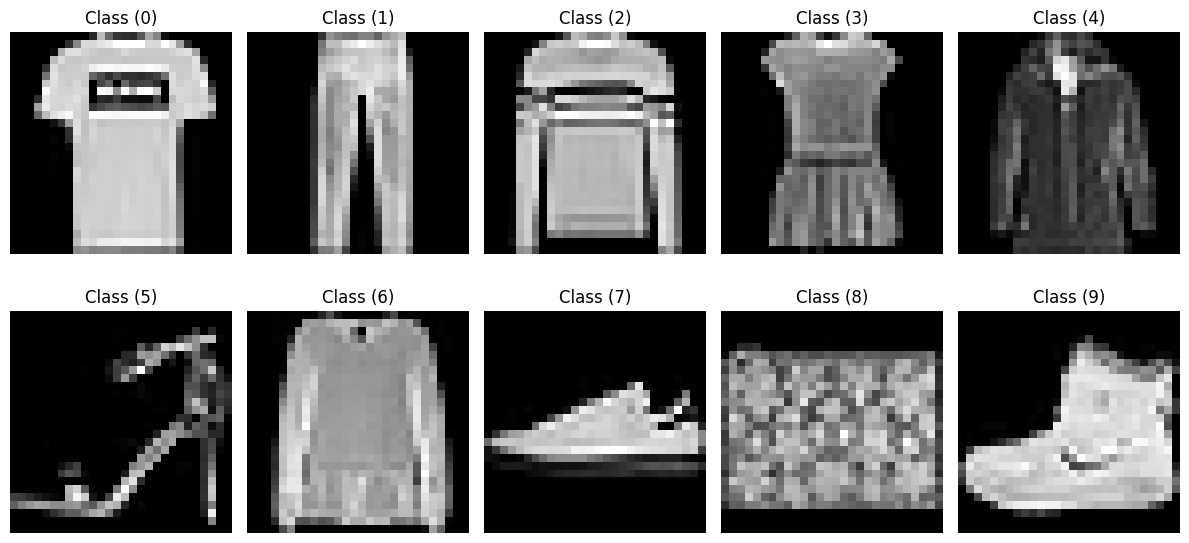

In [7]:
plt.figure(figsize=(12, 6))

for label in np.unique(y_train):
    # Get index of first occurrence of this label
    idx = np.where(y_train == label)[0][0]
    
    plt.subplot(2, 5, label + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f"Class ({label})")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
print(x_train.dtype)

uint8


In [9]:
train_X = x_train.astype('float32')
test_X = x_test.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [10]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, y_train, test_size=0.2, random_state=42)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [11]:
image_rows = train_X.shape[1]
image_cols = train_X.shape[2]
train_X = train_X.reshape(-1,image_rows,image_cols, 1)
valid_X = valid_X.reshape(-1,image_rows,image_cols, 1)
test_X = test_X.reshape(-1,image_rows,image_cols, 1)
train_X.shape, test_X.shape

((48000, 28, 28, 1), (10000, 28, 28, 1))

#### Procedimiento

Se cargan los datos dee entrenamiento y prueba del conjunto Fashion MNIST proporcionado por Keras. Este conjunto contiene 60,000 imágenes para entrenamiento y 10,000 para prueba. Las imágenes son de 28x28 píxeles y representan distintos tipos de prendas y accesorios clasificados en 10 categorías. En el conjunto de entrenamiento, estas categorías están distribuidas equitativamente, con 6,000 imágenes por clase.

Se revisa el tipo de dato de los arreglos y se convierten a tipo float. A continuación, se normalizan los valores para garantizar un buen desempeño de la red neuronal. Después, se divide el conjunto de entrenamiento para extraer una muestra de validación, lo que permite evaluar el comportamiento del modelo durante su entrenamiento.

Finalmente, se ajusta la forma de los datos: de un arreglo tridimensional se pasa a uno de cuatro dimensiones que incorpora el número total de imágenes, sus dimensiones (28x28) y el número de canales, que es 1 en este caso, ya que las imágenes están en escala de grises.

### 2. Estimación de un modelo utilizando redes neuronales convolucionales (45 puntos)

Estimen un modelo predictivo usando la muestra de entrenamiento y establezcan apropiadamente cada uno de los parámetros de la red.

#### Modelo 1

In [12]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
# Modelo Base
fashion_model = Sequential()
fashion_model.add(Input(shape=(image_rows, image_cols, 1)))
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
fashion_model.add(MaxPooling2D((2, 2), padding='same'))
fashion_model.add(Dropout(0.2))
fashion_model.add(Flatten())
fashion_model.add(Dense(64, activation='relu'))
fashion_model.add(Dense(nClasses, activation='softmax'))

In [13]:
from tensorflow.keras.optimizers import Adam

fashion_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                401472    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [14]:
batch_size = 128
epochs = 25

start = time.time()
fashion_train = fashion_model.fit(
    train_X, train_label,
    batch_size = batch_size,
    epochs = epochs,
    verbose=1,
    validation_data=(valid_X, valid_label)
)
end = time.time()
fashion_time = end - start
print(f"Tiempo de entrenamiento: {fashion_time:.2f} segundos")
# Evaluación del modelo


Epoch 1/25
375/375 [==============================] - 9s 22ms/step - loss: 0.4116 - accuracy: 0.8532 - val_loss: 0.3216 - val_accuracy: 0.8824
Epoch 2/25
375/375 [==============================] - 8s 21ms/step - loss: 0.2865 - accuracy: 0.8925 - val_loss: 0.2863 - val_accuracy: 0.8947
Epoch 3/25
375/375 [==============================] - 8s 20ms/step - loss: 0.2506 - accuracy: 0.9056 - val_loss: 0.2946 - val_accuracy: 0.8942
Epoch 4/25
375/375 [==============================] - 8s 21ms/step - loss: 0.2282 - accuracy: 0.9137 - val_loss: 0.2886 - val_accuracy: 0.8963
Epoch 5/25
375/375 [==============================] - 9s 24ms/step - loss: 0.2113 - accuracy: 0.9199 - val_loss: 0.2703 - val_accuracy: 0.9078
Epoch 6/25
375/375 [==============================] - 8s 21ms/step - loss: 0.1912 - accuracy: 0.9271 - val_loss: 0.3237 - val_accuracy: 0.8929
Epoch 7/25
375/375 [==============================] - 8s 20ms/step - loss: 0.1868 - accuracy: 0.9294 - val_loss: 0.2992 - val_accuracy: 0.9046

Train Loss final: 0.099, Train Accuracy final: 0.964
Validation Loss final: 0.499, Validation Accuracy final: 0.898


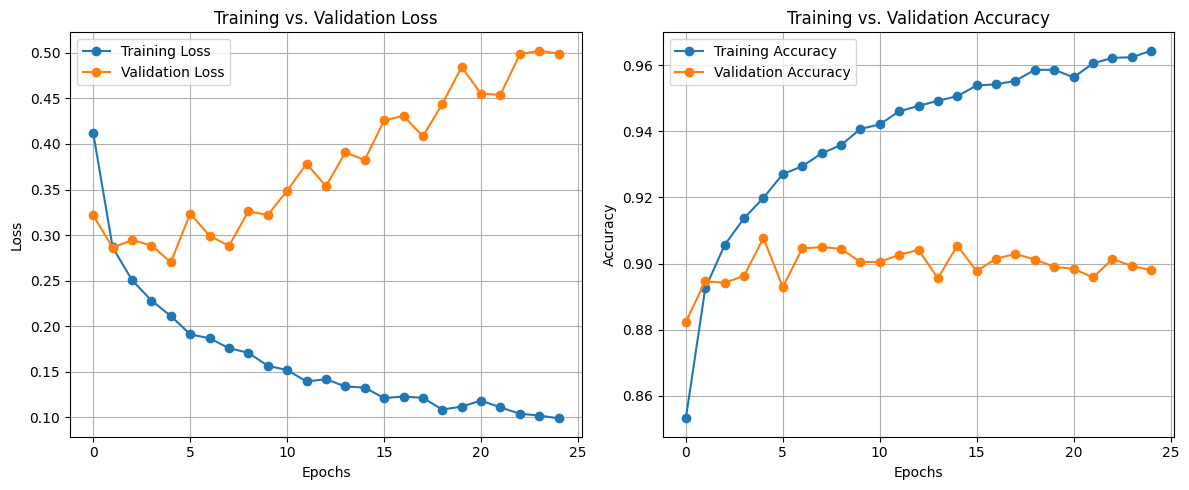

In [15]:
plot_history(fashion_train)

#### Modelo 2


In [18]:
import keras_tuner as kt
from tensorflow.keras.layers import BatchNormalization

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))

    # Calibrar el # de bloques de Convolucion y tamaño de filtros
    for i in range(hp.Int("conv_blocks", 1, 3)):
        filters = hp.Int(f"filters_{i}", min_value=32, max_value=128, step=32)
        model.add(Conv2D(filters=filters, kernel_size=3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=2, padding='same'))
        model.add(Dropout(rate=hp.Float(f"dropout_{i}", 0.2, 0.5, step=0.1)))

    model.add(Flatten())

    # Calibrar el # de capas densas y unidades y dropout
    model.add(Dense(units=hp.Int("dense_units", 64, 256, step=64), activation='relu'))
    model.add(Dropout(rate=hp.Float("dense_dropout", 0.2, 0.5, step=0.1)))
    model.add(Dense(10, activation='softmax'))

    # Calibrar la tasa de aprendizaje
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice("lr", [1e-2, 1e-3, 1e-4])),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [19]:
tuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=10,
    factor=3,
    directory="tuner_dir",
    project_name="fashion_tune"
)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

In [21]:
start = time.time()
tuner.search(
    train_X, train_label,
    validation_data=(valid_X, valid_label),
    epochs=15,
    callbacks=[early_stop],
    verbose=1
)
end = time.time()
tuner_time = end - start
print(f"Tiempo de entrenamiento: {tuner_time:.2f} segundos")


Trial 30 Complete [00h 05m 04s]
val_accuracy: 0.8414166569709778

Best val_accuracy So Far: 0.9243333339691162
Total elapsed time: 01h 31m 14s
Tiempo de entrenamiento: 5474.36 segundos


In [22]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Mejores Hiperparametros:")
for k, v in best_hps.values.items():
    print(f"{k}: {v}")

Mejores Hiperparametros:
conv_blocks: 1
filters_0: 96
dropout_0: 0.2
dense_units: 192
dense_dropout: 0.4
lr: 0.0001
filters_1: 96
dropout_1: 0.2
filters_2: 96
dropout_2: 0.30000000000000004
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012


##### Hiperparametros encontrados

Mejores Hiperparametros:
conv_blocks: 1
filters_0: 96
dropout_0: 0.2
dense_units: 192
dense_dropout: 0.4
lr: 0.0001
filters_1: 96
dropout_1: 0.2
filters_2: 96
dropout_2: 0.30000000000000004
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012

In [23]:
best_model.save("best_fashion_model.keras")

##### Entrenar nuevo modelo con mejores hiperparametros

In [24]:
fashion_model_t = build_model(best_hps)

In [25]:
fashion_model_t.compile(
    optimizer=Adam(learning_rate=best_hps.get('lr')),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
fashion_model_t.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 96)        960       
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 96)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 96)        0         
                                                                 
 flatten_1 (Flatten)         (None, 18816)             0         
                                                                 
 dense_2 (Dense)             (None, 192)              

In [28]:
start = time.time()
fashion_model_t_train = fashion_model_t.fit(
    train_X, train_label,
    validation_data=(valid_X, valid_label),
    epochs=25,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)
end = time.time()
fashion_model_t_time = end - start
print(f"Tiempo de entrenamiento: {fashion_model_t_time:.2f} segundos")

Epoch 1/25
375/375 [==============================] - 50s 131ms/step - loss: 0.4951 - accuracy: 0.8248 - val_loss: 0.8720 - val_accuracy: 0.8687
Epoch 2/25
375/375 [==============================] - 51s 136ms/step - loss: 0.3343 - accuracy: 0.8804 - val_loss: 0.2800 - val_accuracy: 0.8972
Epoch 3/25
375/375 [==============================] - 48s 127ms/step - loss: 0.2824 - accuracy: 0.8981 - val_loss: 0.2530 - val_accuracy: 0.9066
Epoch 4/25
375/375 [==============================] - 50s 134ms/step - loss: 0.2523 - accuracy: 0.9085 - val_loss: 0.2363 - val_accuracy: 0.9099
Epoch 5/25
375/375 [==============================] - 47s 125ms/step - loss: 0.2260 - accuracy: 0.9175 - val_loss: 0.2351 - val_accuracy: 0.9130
Epoch 6/25
375/375 [==============================] - 47s 125ms/step - loss: 0.2048 - accuracy: 0.9238 - val_loss: 0.2207 - val_accuracy: 0.9175
Epoch 7/25
375/375 [==============================] - 46s 121ms/step - loss: 0.1882 - accuracy: 0.9309 - val_loss: 0.2199 - val_ac

Train Loss final: 0.099, Train Accuracy final: 0.963
Validation Loss final: 0.228, Validation Accuracy final: 0.924


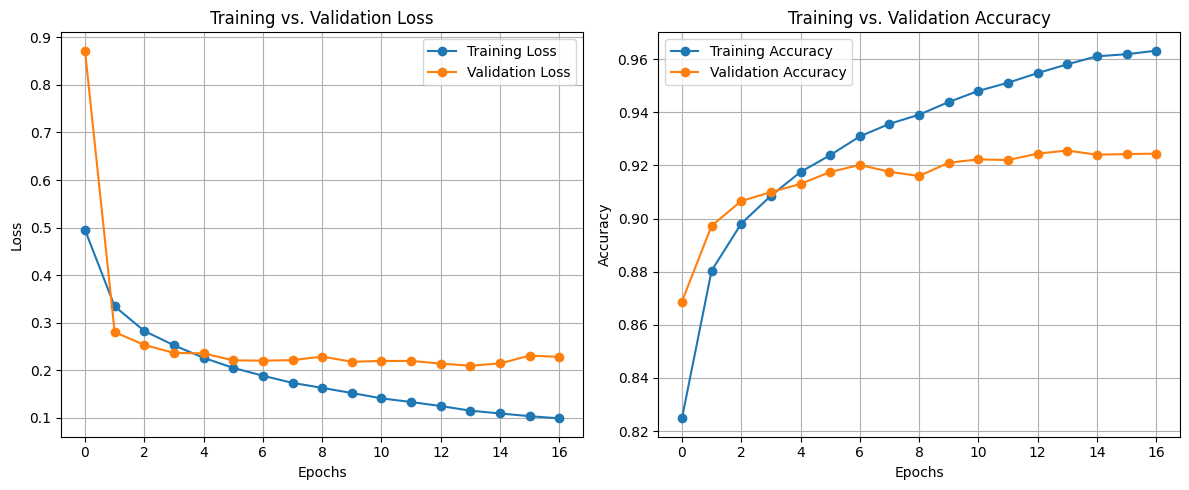

In [29]:
plot_history(fashion_model_t_train)

#### Comparacion Modelos

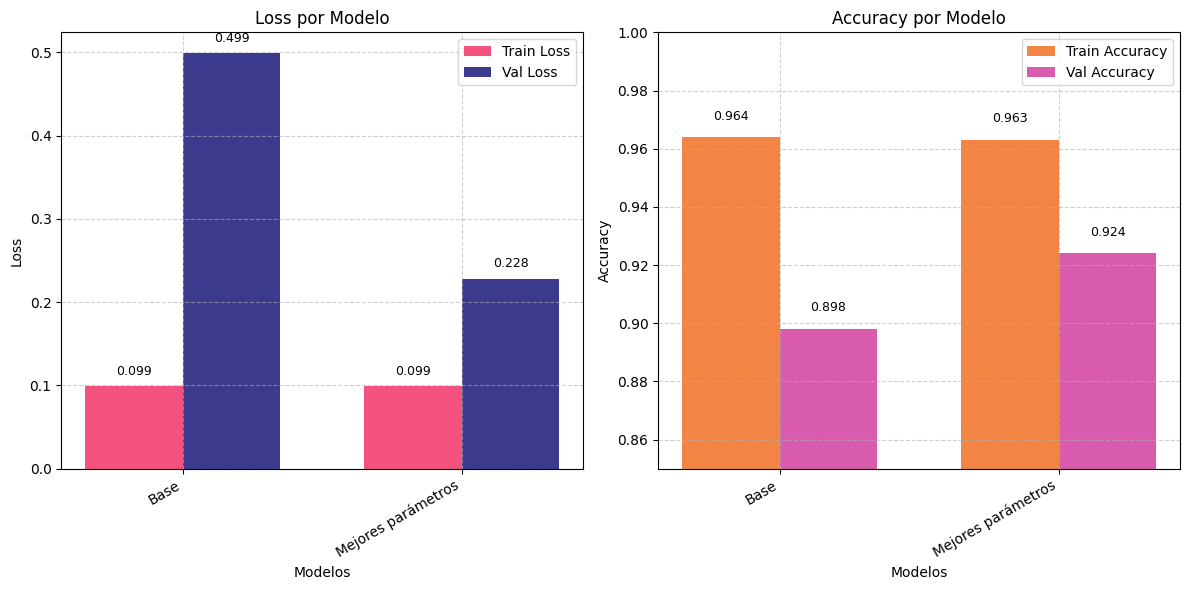

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Etiquetas de los modelos
modelos = ['Base', 'Mejores parámetros']

# Valores finales proporcionados
loss_train = [0.099, 0.099]
loss_val = [0.499, 0.228]
accuracy_train = [0.964, 0.963]
accuracy_val = [0.898, 0.924]

x = np.arange(len(modelos))
width = 0.35

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# --- Loss ---
bars1 = axs[0].bar(x - width/2, loss_train, width, label='Train Loss', color='#F2527D')
bars2 = axs[0].bar(x + width/2, loss_val, width, label='Val Loss', color='#3C3A8C')
axs[0].set_title('Loss por Modelo')
axs[0].set_xlabel('Modelos')
axs[0].set_ylabel('Loss')
axs[0].set_xticks(x)
axs[0].set_xticklabels(modelos, rotation=30, ha='right')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.6)

# Etiquetas de valor
for bar in bars1:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.3f}', ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# --- Accuracy ---
bars3 = axs[1].bar(x - width/2, accuracy_train, width, label='Train Accuracy', color='#F28444')
bars4 = axs[1].bar(x + width/2, accuracy_val, width, label='Val Accuracy', color='#D95BAD')
axs[1].set_title('Accuracy por Modelo')
axs[1].set_xlabel('Modelos')
axs[1].set_ylabel('Accuracy')
axs[1].set_xticks(x)
axs[1].set_xticklabels(modelos, rotation=30, ha='right')
axs[1].set_ylim(0.85, 1.0)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.6)

# Etiquetas de valor
for bar in bars3:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.3f}', ha='center', va='bottom', fontsize=9)
for bar in bars4:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


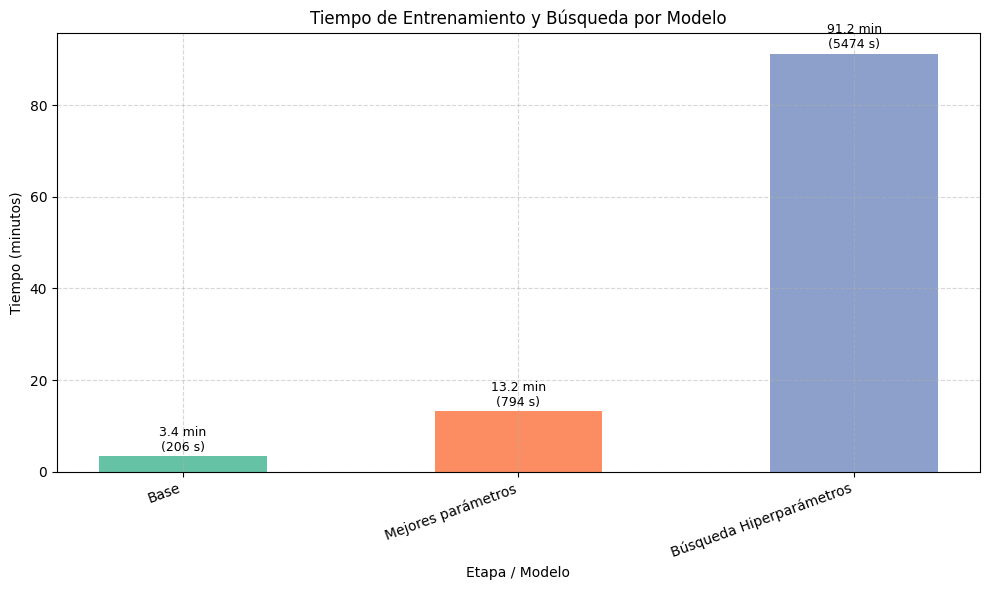

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Modelos
modelos = ['Base', 'Mejores parámetros', 'Búsqueda Hiperparámetros']

# Tiempos en segundos
tiempos_segundos = [206.27, 794.28, 5474.36]
tiempos_minutos = [t / 60 for t in tiempos_segundos]

x = np.arange(len(modelos))
width = 0.5

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#66C2A5', '#FC8D62', '#8DA0CB']
bars = ax.bar(x, tiempos_minutos, width, color=colors)

# Etiquetas y formato
ax.set_title('Tiempo de Entrenamiento y Búsqueda por Modelo')
ax.set_xlabel('Etapa / Modelo')
ax.set_ylabel('Tiempo (minutos)')
ax.set_xticks(x)
ax.set_xticklabels(modelos, rotation=20, ha='right')
ax.grid(True, linestyle='--', alpha=0.5)

# Mostrar valores encima de las barras
for bar, t_sec in zip(bars, tiempos_segundos):
    height = bar.get_height()
    label = f'{height:.1f} min\n({t_sec:.0f} s)'
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, label, ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


##### Procedimiento Análisis y Conclusiones

Para el desarrollo de este punto se siguieron estos pasos:


1. Se entrenó un modelo inicial utilizando los mismos parámetros empleados en el laboratorio formativo de la semana, con la única diferencia de que se utilizó un tamaño de lote de 128. Sin embargo, los resultados obtenidos no fueron favorables, ya que la pérdida en el conjunto de validación fue casi cinco veces mayor que la observada en el conjunto de entrenamiento.

2. Se decidió calibrar el modelo para evaluar si era posible encontrar una configuración que se ajustara mejor a los datos de Fashion MNIST, utilizando **Keras Tuner**. El objetivo era identificar el número adecuado de bloques de convolución y la cantidad de filtros en cada uno, así como la cantidad de neuronas en la penúltima capa densa, y las tasas óptimas de dropout y de aprendizaje. En esta oportunidad, se utilizó el algoritmo de búsqueda Hyperband (ya se habían probado GridSearch y RandomSearch en el proyecto de competencia). Este método inicia la búsqueda evaluando una gran cantidad de combinaciones de hiperparámetros por pocas épocas, descartando rápidamente aquellas con bajo rendimiento, y dedicando más épocas a las configuraciones más prometedoras.

3. Luego de encontrar estos hiperparametros se decidio entrenar un nuevo modelo con esos mejores hiperparametros encontrados pra poder ver como se comportaba la perdida y accuracy de entrenamiento y validacion, 

Al comparar finalmente los resultados se puede concluir que con la calibración efectivamente se obtienen mejores resultados en el conjunto de validacion (pérdida y accuracy).


### 3. Calidad de la predicción (40 puntos)

Evalúe el desempeño de su algoritmo con el set de _test_ y argumente sobre el nivel de precisión obtenido, tiempo de ejecución y la arquitectura de su red convolucional.

In [38]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####
test_loss_fashion, test_Accuracy_fashion = fashion_model.evaluate(test_X, y_test)
test_loss_best_model, test_Accuracy_best_model = best_model.evaluate(test_X, y_test)
test_loss_fashion_model_t, test_Accuracy_fashion_model_t = fashion_model_t.evaluate(test_X, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2392 - accuracy: 0.9198


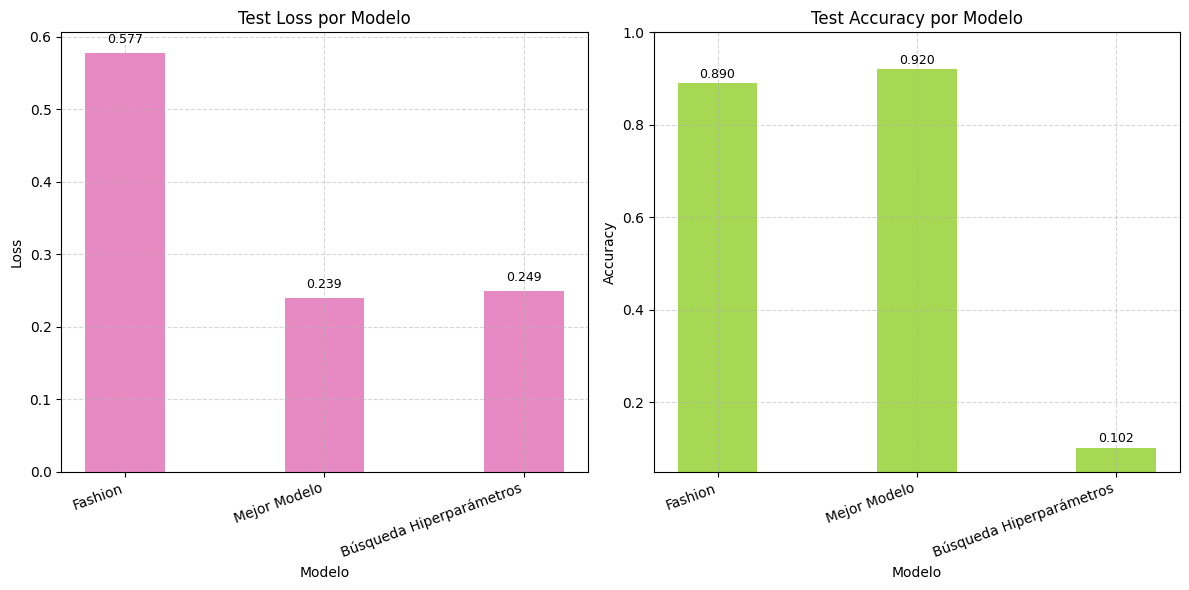

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Nombres de los modelos
modelos = ['Fashion', 'Mejor Modelo', 'Búsqueda Hiperparámetros']

# Resultados de test (asegúrate de usar los valores reales de evaluate)
test_loss = [test_loss_fashion, test_loss_fashion_model_t, test_loss_best_model]
test_accuracy = [test_Accuracy_fashion, test_Accuracy_fashion_model_t, test_Accuracy_best_model]

# Configuración del gráfico
x = np.arange(len(modelos))
width = 0.4

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# --- Test Loss ---
bars1 = axs[0].bar(x, test_loss, width, color='#E78AC3')
axs[0].set_title('Test Loss por Modelo')
axs[0].set_xlabel('Modelo')
axs[0].set_ylabel('Loss')
axs[0].set_xticks(x)
axs[0].set_xticklabels(modelos, rotation=20, ha='right')
axs[0].grid(True, linestyle='--', alpha=0.5)

# Etiquetas de valor
for bar in bars1:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# --- Test Accuracy ---
bars2 = axs[1].bar(x, test_accuracy, width, color='#A6D854')
axs[1].set_title('Test Accuracy por Modelo')
axs[1].set_xlabel('Modelo')
axs[1].set_ylabel('Accuracy')
axs[1].set_xticks(x)
axs[1].set_xticklabels(modelos, rotation=20, ha='right')
axs[1].set_ylim(0.05, 1.0)
axs[1].grid(True, linestyle='--', alpha=0.5)

# Etiquetas de valor
for bar in bars2:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


313/313 [==============================] - 2s 6ms/step
Se encontraron 9157 labels correctos


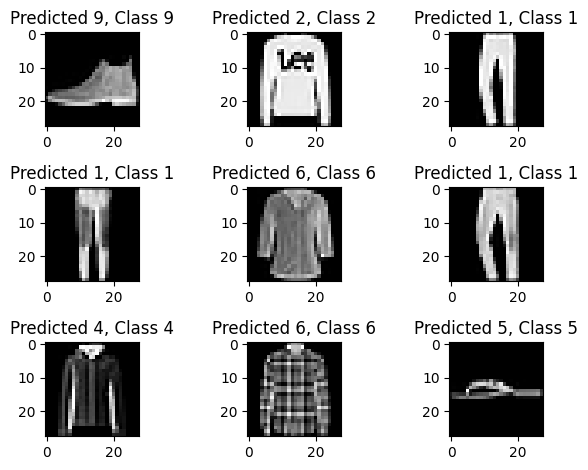

In [43]:
predicted_classes = fashion_model_t.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct = np.where(predicted_classes==y_test)[0]
test="Se encontraron %s labels correctos" % len(correct)
print(test) 
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

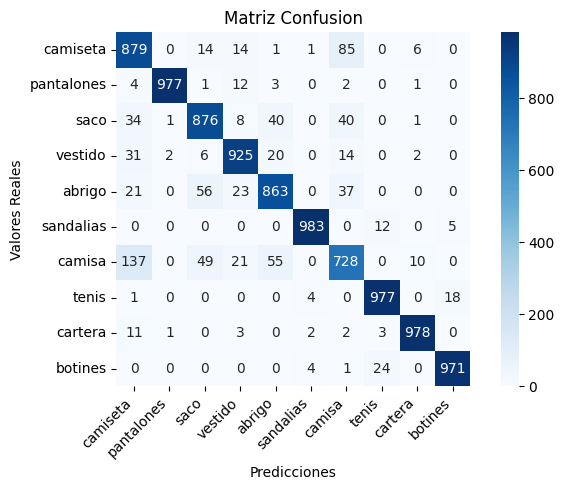

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
class_names = [
    'camiseta', 'pantalones', 'saco', 'vestido', 'abrigo',
    'sandalias', 'camisa', 'tenis', 'cartera', 'botines'
]
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.xticks(rotation=45, ha='right')

plt.title('Matriz Confusion')
plt.tight_layout()
plt.show()

EL tiempo de ejecuccion del modelo inicial fue de 206.27 segundos

Mientras que la busqueda de hiperparametros fue de 5474.36 segundos o 91 minutos.

Y el modelo tomando estos hiperparametros fue de 794.28 segundos.

Finalmente se calculan la pérdida y accuracy para los cuatro modelos obtenidos y se obtienen los siguientes resultados:

Como se pudo observar antes, el mejor modelo es un modelo entrenado desde 0 con los mejores hiperparametros encontrados. Donde se obtiene una perdida de entrenamiento de 0.239 y un accuracy de 0.920. 

Si vemos la matriz de confusion tambien se encuentra un muy buen desempeño pero podemos ver cómo las confusiones ocurren principalmente con las camisas, camisetas, y sacos ya que estas pueden confundirse fácilmente al ser todas prendas superiores. Por el contrario, las menores equivocaciones se presentan con las sandalias (12 veces con tenis y 5 veces con botines). 

Lo que se ha concluido hasta el momento en el desarrollo del curso es que la calibración es una parte crucial en la construcción de redes neuronales. Incluir más capas o más neuronas no siempre es la mejor opción, ya que puede llevar a sobreajuste (overfitting), lo cual degrada la capacidad de generalización del modelo. Además, al trabajar con una gran cantidad de parámetros, la búsqueda de los hiperparámetros adecuados se vuelve un desafío complejo. Por lo tanto, no existe un manual de instrucciones universal que determine qué hacer en cada caso, ya que cada problema presenta características únicas. Esto requiere un proceso continuo de prueba y error, donde se deben ajustar diversos parámetros antes de determinar el modelo que mejor se adapta a los datos y a los objetivos del proyecto.